In [38]:
import simpy
from simpy.events import NORMAL

from ban.base.helper.mobility_helper import MobilityHelper
from ban.base.mobility import MobilityModel, BodyPosition


env = simpy.Environment()

# 앞에 애들은 움직이지 않는 애들임
positions = tuple(BodyPosition)[7:]
mob_helper = MobilityHelper(env)

mobs = []
for pos in positions:
    mob = MobilityModel(pos)
    mobs.append(mob)
    mob_helper.add_mobility_list(mob)

mob_helper.do_walking(env)

mobs_pos = [[[], [], []] for _ in range(len(positions))]

def print_info(ev):
    for idx, mob in enumerate(mob_helper.mobility_list):
        mobs_pos[idx][0].append(mob.get_position().x)
        mobs_pos[idx][1].append(mob.get_position().y)
        mobs_pos[idx][2].append(mob.get_position().z)


    event = simpy.Event(env)
    event.env = env
    event._ok = True
    event.callbacks.append(print_info)

    env.schedule(event, priority=NORMAL, delay=0.001)

print_info(env)
env.run(until=5)


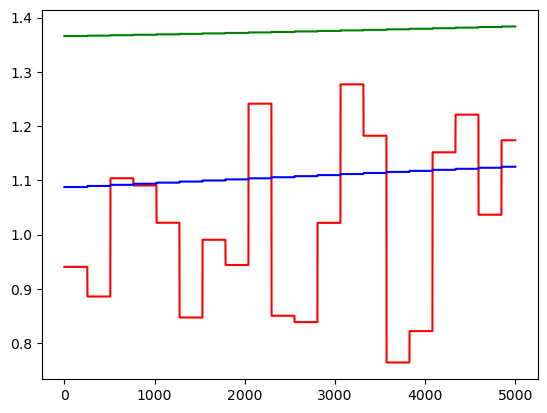

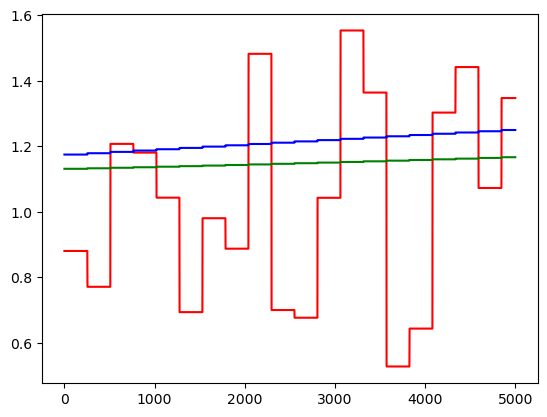

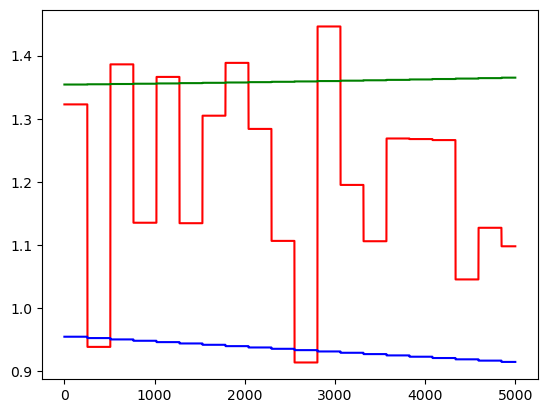

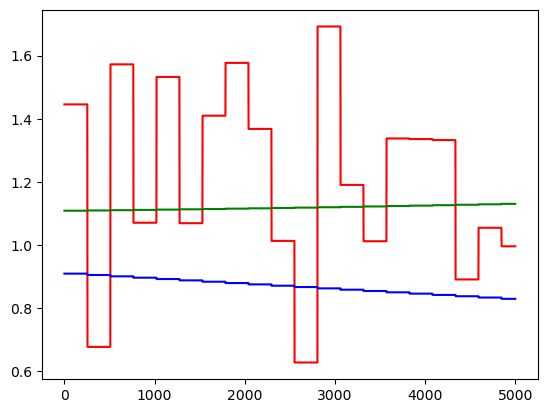

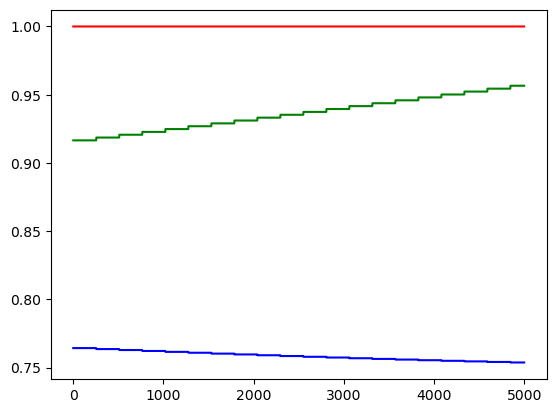

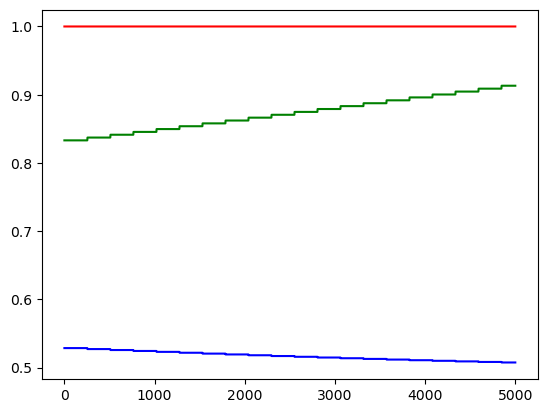

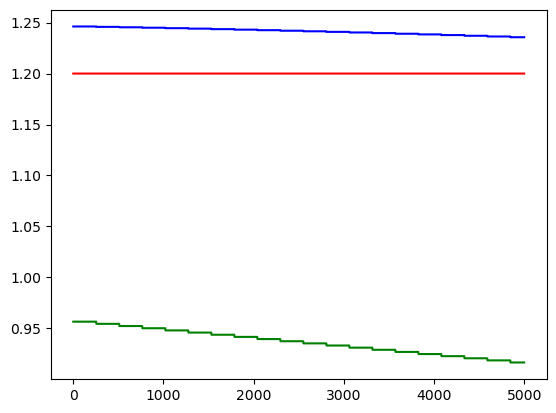

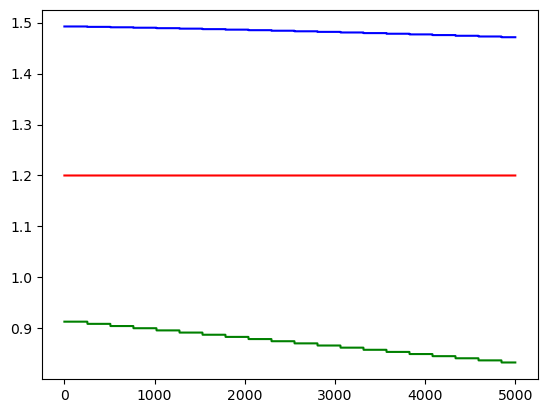

In [39]:
import matplotlib.pyplot as plt

for idx, mob in enumerate(mobs):
    plt.plot(mobs_pos[idx][0], c='r')
    plt.plot(mobs_pos[idx][1], c='g')
    plt.plot(mobs_pos[idx][2], c='b')
    plt.show()